In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = {'Axis': [0.38710, 0.72333, 1, 1.52366, 5.20336, 9.53707, 19.1913, 30.0690], 'Period': [87.9693, 224.7008, 365.2564, 686.9796, 4332.8201, 10775.599, 30687.153, 60190.03]}

frame = pd.DataFrame(data)
frame

,Axis,Period
0,0.38710,87.9693
1,0.72333,224.7008
2,1.00000,365.2564
3,1.52366,686.9796
4,5.20336,4332.8201
5,9.53707,10775.5990
6,19.19130,30687.1530
7,30.06900,60190.0300


<AxesSubplot:xlabel='Axis'>

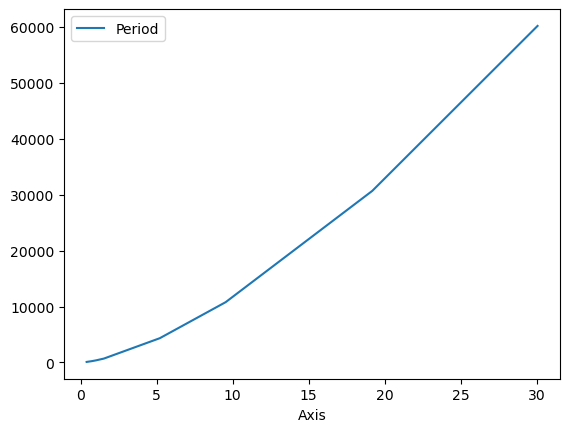

In [5]:
frame.plot(y='Period', x='Axis')

In [38]:
import math

def predict(x, model):
  log_prediction = model.predict(np.array([math.log10(x)]).reshape(-1, 1))[0]
  prediction = pow(10.0, log_prediction)
  print(f"prediction: {prediction}")
  return prediction

def regress(x, y):
  model = LinearRegression()

  # log-log
  x_log = np.log10(x)
  y_log = np.log10(y)

  model.fit(x_log.reshape(-1, 1), y_log)

  r_sq = model.score(x_log.reshape(-1, 1), y_log)
  print(f"coefficient of determination: {r_sq}")
  print(f"intercept: {model.intercept_}")
  print(f"slope: {model.coef_}")

  this_normalize = lambda pair: normalize(pair, model)

  zipped_array = np.array(list(zip(x, y)))
  # print(f"Zipped: {zipped_array}")

  return model

In [39]:
model = regress(frame["Axis"].to_numpy(), frame["Period"].to_numpy())

coefficient of determination: 0.9999999062866357
intercept: 2.562618016333121
slope: [1.49994412]


In [40]:
# frame.insert(2, 'Regression', frame["Axis"].map(lambda x: predict(x, model)))
frame["Regression"] = frame["Axis"].map(lambda x: predict(x, model))
frame

prediction: 87.97834844385586
prediction: 224.7142393526398
prediction: 365.2733741238538
prediction: 686.9733606836087
prediction: 4335.1467431578585
prediction: 10756.865633786983
prediction: 30704.56227136916
prediction: 60216.27679218688


,Axis,Period,Regression
0,0.38710,87.9693,87.978348
1,0.72333,224.7008,224.714239
2,1.00000,365.2564,365.273374
3,1.52366,686.9796,686.973361
4,5.20336,4332.8201,4335.146743
5,9.53707,10775.5990,10756.865634
6,19.19130,30687.1530,30704.562271
7,30.06900,60190.0300,60216.276792


<AxesSubplot:xlabel='Axis'>

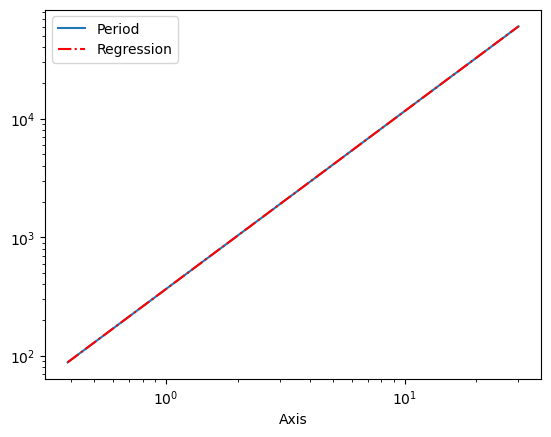

In [51]:
ax = frame.plot(x='Axis', y='Period', logx=True, logy=True)
frame.plot(x='Axis', y='Regression',color='Red', style='-.',ax=ax)